<a href="https://colab.research.google.com/github/Em-Astute2002/Machine-Learning/blob/master/studentperformance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Student Performance for Exam**

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing the dataset
studentdata = pd.read_csv("/content/drive/MyDrive/StudentsPerformance.csv")
studentdata.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


**Data Wrangling**

In [3]:
studentdata['lunch'].unique()

array(['standard', 'free/reduced'], dtype=object)

In [4]:
studentdata['race/ethnicity'].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

In [5]:
studentdata['parental level of education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [6]:
studentdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [7]:
studentdata.shape

(1000, 8)

**Data Visualization**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


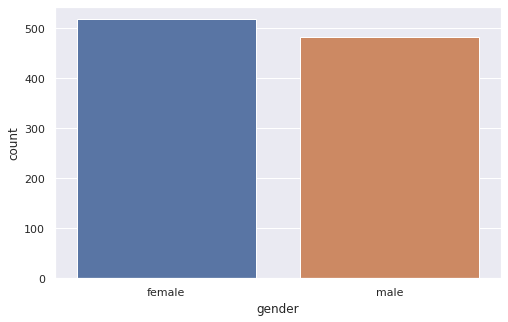

In [8]:
sns.set(rc={'figure.figsize':(8,5)})

sns.countplot(studentdata["gender"])

In [9]:
studentdata["gender"].value_counts()

female    518
male      482
Name: gender, dtype: int64

This is showing the number of student in gender: we have `518` female and `482` male

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


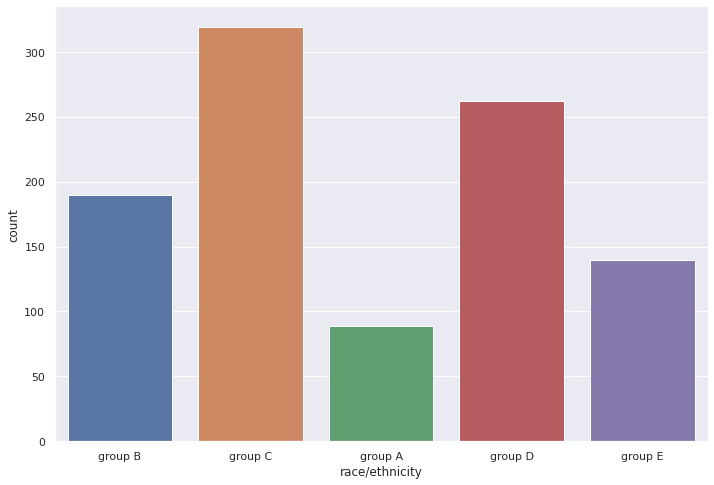

In [10]:
sns.set(rc={'figure.figsize':(11.7,8)})

sns.countplot(studentdata['race/ethnicity'])

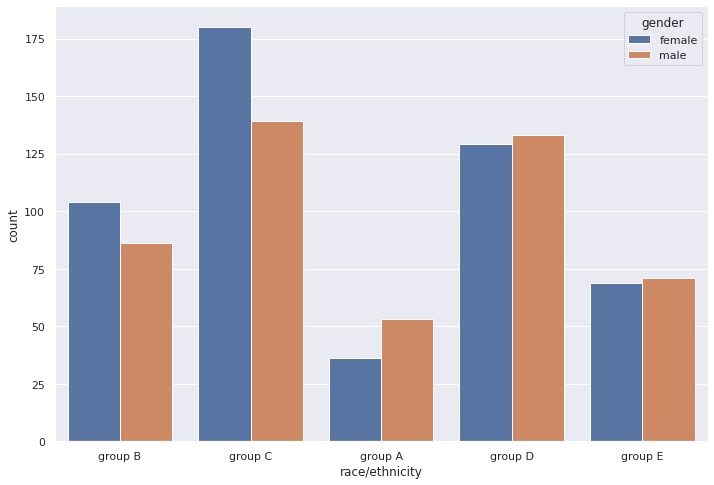

In [11]:
sns.countplot(x='race/ethnicity', hue='gender', data= studentdata)

In [12]:
studentdata["race/ethnicity"].value_counts()

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64

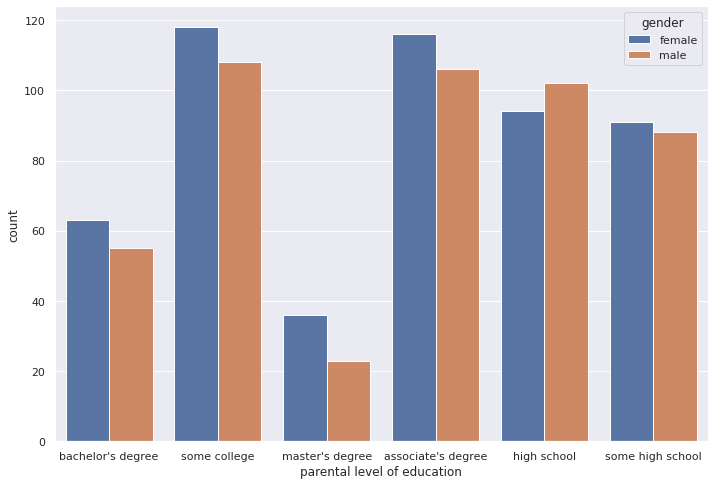

In [13]:
sns.countplot(x='parental level of education', hue='gender', data= studentdata)

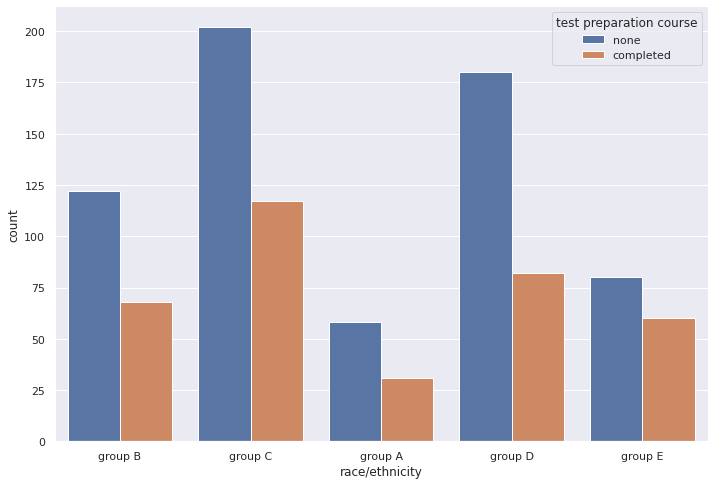

In [14]:
sns.countplot(x='race/ethnicity', hue='test preparation course', data= studentdata)

([<matplotlib.patches.Wedge at 0x7ff08bfd20d0>,
 [Text(-0.47460171119818767, 0.9923473261553901, 'None'),
  Text(0.4746018041084478, -0.9923472817199666, 'Completed')])

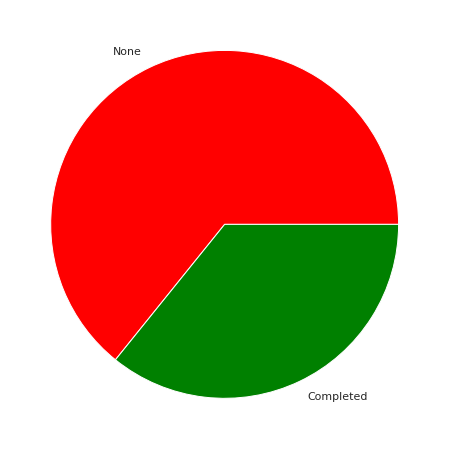

In [15]:
labels = ['None','Completed']
colors=['red','green']
plt.pie(studentdata['test preparation course'].value_counts() , labels = labels, colors = colors)

In [16]:
studentdata["test preparation course"].value_counts()

none         642
completed    358
Name: test preparation course, dtype: int64

**Data Preprocessing**

In [17]:
from sklearn.preprocessing import LabelEncoder
lc = LabelEncoder()
studentdata['gender'] = lc.fit_transform(studentdata['gender'])
studentdata['race/ethnicity'] = lc.fit_transform(studentdata['race/ethnicity'])
studentdata['parental level of education'] = lc.fit_transform(studentdata['parental level of education'])
studentdata['lunch'] = lc.fit_transform(studentdata['lunch'])
studentdata['test preparation course'] = lc.fit_transform(studentdata['test preparation course'])
studentdata.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,1,1,1,1,72,72,74
1,0,2,4,1,0,69,90,88
2,0,1,3,1,1,90,95,93
3,1,0,0,0,1,47,57,44
4,1,2,4,1,1,76,78,75


In [18]:
studentdata['mean score']=((studentdata['math score'] + studentdata['reading score'] + studentdata['writing score'])/3).round()
studentdata.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,mean score
0,0,1,1,1,1,72,72,74,73.0
1,0,2,4,1,0,69,90,88,82.0
2,0,1,3,1,1,90,95,93,93.0
3,1,0,0,0,1,47,57,44,49.0
4,1,2,4,1,1,76,78,75,76.0


In [19]:
grading = []

for score in studentdata['mean score']:
  if score < 50.0 :
    grading.append("Failed")
  elif score <= 70:
    grading.append("Consideration")
  elif score > 70:
    grading.append("Admitted")

  else:
    grading.append("Requirement Not Met")

In [20]:
studentdata["grading"] = grading
studentdata.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,mean score,grading
0,0,1,1,1,1,72,72,74,73.0,Admitted
1,0,2,4,1,0,69,90,88,82.0,Admitted
2,0,1,3,1,1,90,95,93,93.0,Admitted
3,1,0,0,0,1,47,57,44,49.0,Failed
4,1,2,4,1,1,76,78,75,76.0,Admitted


In [21]:
studentdata['grading'] = lc.fit_transform(studentdata['grading'])
studentdata.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,mean score,grading
0,0,1,1,1,1,72,72,74,73.0,0
1,0,2,4,1,0,69,90,88,82.0,0
2,0,1,3,1,1,90,95,93,93.0,0
3,1,0,0,0,1,47,57,44,49.0,2
4,1,2,4,1,1,76,78,75,76.0,0


**Splitting data into dependent and independent variable**

In [22]:
df = studentdata.drop(['math score', 'writing score', 'reading score'], axis=1)
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,mean score,grading
0,0,1,1,1,1,73.0,0
1,0,2,4,1,0,82.0,0
2,0,1,3,1,1,93.0,0
3,1,0,0,0,1,49.0,2
4,1,2,4,1,1,76.0,0


In [23]:
from sklearn.model_selection import train_test_split

y= df['grading'].values
x=(df.drop(['grading'],axis=1)).values[:,0:]

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2)

In [25]:
x=df.drop(['grading'],axis=1)
x.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,mean score
0,0,1,1,1,1,73.0
1,0,2,4,1,0,82.0
2,0,1,3,1,1,93.0
3,1,0,0,0,1,49.0
4,1,2,4,1,1,76.0


**Building a model**

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [33]:
model = LogisticRegression(C=1.0, fit_intercept=True, intercept_scaling=1, class_weight='balanced', random_state=None, max_iter=1000)
model.fit(x_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [34]:
pred = model.predict(x_test)

In [35]:
y_test

array([0, 0, 1, 1, 1, 0, 0, 1, 2, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 2, 1,
       2, 0, 0, 1, 1, 1, 1, 0, 2, 0, 0, 1, 1, 0, 2, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 2, 1, 0, 2, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 2, 0, 1,
       0, 0, 1, 0, 0, 2, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 2, 1, 1, 1, 2, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 2, 0, 1, 0, 0, 0, 1, 0, 2, 1, 1,
       1, 0, 1, 2, 1, 0, 1, 2, 1, 0, 2, 0, 1, 2, 2, 1, 1, 0, 1, 1, 1, 0,
       1, 1])

In [38]:
from sklearn.metrics import accuracy_score, f1_score

acc = accuracy_score(y_test, pred)
acc

1.0